In [25]:
# Import the libraries
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
import os
import time

In [26]:
path = r"C:\Users\abenes\Documents\YNOV M2\YDAYS"
os.chdir(path)
os.getcwd() 
covid_tweets_20201214_161536 = pd.read_csv('20201214_161536_covid_tweets.csv')
covid_tweets_20201215_160305 = pd.read_csv('20201215_160305_covid_tweets.csv')
covid_tweets_20201215_165108 = pd.read_csv('20201215_165108_covid_tweets.csv')
covid_tweets_20201215_202424 = pd.read_csv('20201215_202424_covid_tweets.csv')
covid_tweets_20201216_110754 = pd.read_csv('20201216_110754_covid_tweets.csv')
covid_tweets_20201216_181415 = pd.read_csv('20201216_181415_covid_tweets.csv')
covid_tweets_20201218_115402= pd.read_csv('20201218_115402_covid_tweets.csv')
covid_tweets_20210113_140928= pd.read_csv('20210113_140928_covid_tweets.csv')
covid_tweets_20210113_150115= pd.read_csv('20210113_150115_covid_tweets.csv')
covid_tweets_20210113_200521= pd.read_csv('20210113_200521_covid_tweets.csv')



covid_tweets=pd.concat([covid_tweets_20201214_161536, covid_tweets_20201215_160305,
                        covid_tweets_20201215_165108,covid_tweets_20201215_202424,covid_tweets_20201216_110754,
                       covid_tweets_20201216_181415
                          ,covid_tweets_20201218_115402,
                       covid_tweets_20210113_140928,covid_tweets_20210113_150115,covid_tweets_20210113_200521])
##Suppresion des doublons
covid_tweets.drop_duplicates(subset ="text", keep = 'first', inplace=True)
covid_tweets

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,lagrostA,Retraitée DGA/EM/TLN,Var,1999,5749,610779,2011-05-16 15:38:35,2020-12-14 14:41:13,3,"🔴Marcel Benezet (@Marcel_Benezet), Président c...",[]
1,e_lefebvre,"journaliste, Rédacteur en chef France, Interna...",NaN,598,3503,5789,2012-05-21 11:49:43,2020-12-14 14:40:40,1,"Au 1er octobre, 5 millions de salariés avaient...",[]
2,WilfriedSerre,Montrougien\nCandidat Résistons! aux législati...,"Montrouge, France",72,241,2163,2016-09-23 14:36:58,2020-12-14 14:40:16,0,#Gouvernement #France #Macron #Castex : Pourq...,"[{'text': 'Gouvernement', 'indices': [0, 13]},..."
3,GioanolaA,Love principles of common law,NaN,369,228,16197,2020-04-20 15:38:52,2020-12-14 14:40:01,368,"NostraBillGates vous annonce que ""les prochain...",[]
4,Mycho,Journaliste · Caribbean blogger avec @lbdemc ·...,Guadeloupe · Caraibe,1131,6974,47695,2008-05-15 03:24:45,2020-12-14 14:40:00,0,"""Le malheur était venu de la croisière, cette ...","[{'text': 'Guadeloupe', 'indices': [162, 173]}..."
...,...,...,...,...,...,...,...,...,...,...,...
1614,OneTeamFootball,NaN,NaN,83,795,736,2017-11-07 13:35:23,2021-01-13 18:34:52,0,💉 @_OlivierGiroud_ et @leodubois15 s’engagent ...,"[{'text': 'Covid_19', 'indices': [71, 80]}, {'..."
1621,profdhistgeo,J'essaye parfois d'enseigner. De temps à autre...,NaN,1732,1165,33964,2018-01-31 12:03:09,2021-01-13 18:34:23,0,#covid19 \nÉmission spéciale chez @ThomasSotto...,"[{'text': 'covid19', 'indices': [0, 8]}, {'tex..."
1628,Running93137953,NaN,"Paris, France",3,6,918,2019-12-23 19:03:21,2021-01-13 18:33:29,0,Nous ne devons pas subir incompétence du #gouv...,"[{'text': 'gouvernement', 'indices': [41, 54]}..."
1632,AllezSavoirFest,Festival des sciences sociales. 22-26 sept. 20...,"Marseille, France",130,551,684,2019-06-05 14:20:05,2021-01-13 18:32:20,0,📰 Un intervenant de la 1ère édition de notre f...,"[{'text': 'vaccination', 'indices': [184, 196]..."


In [27]:
def info_txt(data,text):

# on compte le nombre de mot en majuscule 
#la colère ou la rage s’exprime assez souvent en écrivant en lettres MAJUSCULES,
# ce qui en fait une opération indispensable pour identifier ces mots.
    data['upper_wrd_cnt'] = data[text].apply(lambda x: len([x for x in x.split() if x.isupper()]))
# on compte le nombre de mot: des fois des phrases courtes expriment un truc bref un énervement    
    data['word_count'] = data[text].apply(lambda x: len(str(x).split(" ")))

    return data

In [28]:
import re
#Les tweets sont des objets très sales !,Le nettoyage des tweets comprendra plusieurs choses :
#Enlever les emojis 
#Retirer la ponctuation 
#Retirer les caractères spéciaux  
#Retirer les chiffres 
#Changer les lettres majuscules en minuscules
def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r"\_", "", text)
    text = re.sub(r"https", "", text)
    return text

In [29]:
info_txt(covid_tweets,'text')
corpus = covid_tweets['text']
covid_tweets['corpus_clean'] = corpus.apply(nlp_pipeline)
covid_tweets['corpus_clean']

0       🔴marcel benezet marcelbenezet président cafés ...
1       au  octobre  millions de salariés avaient déjà...
2       gouvernement france macron castex  pourquoi se...
3       nostrabillgates vous annonce que les prochains...
4       le malheur était venu de la croisière cette fo...
                              ...                        
1614    💉 oliviergiroud et  s’engagent pour la vaccina...
1621     émission spéciale chez thomassotto rtlfrance ...
1628    nous ne devons pas subir incompétence du gouve...
1632    📰 un intervenant de la ère édition de notre fe...
1634    one small sting for our colleagues at clinique...
Name: corpus_clean, Length: 4713, dtype: object

In [30]:
covid_tweets['sentiment']=covid_tweets ['corpus_clean'].apply (lambda x: TextBlob (x) .sentiment[0])
covid_tweets['subjectivity']=covid_tweets ['corpus_clean'].apply (lambda x: TextBlob (x) .sentiment[1])
covid_tweets

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,upper_wrd_cnt,word_count,corpus_clean,sentiment,subjectivity
0,lagrostA,Retraitée DGA/EM/TLN,Var,1999,5749,610779,2011-05-16 15:38:35,2020-12-14 14:41:13,3,"🔴Marcel Benezet (@Marcel_Benezet), Président c...",[],2,34,🔴marcel benezet marcelbenezet président cafés ...,0.000,0.00
1,e_lefebvre,"journaliste, Rédacteur en chef France, Interna...",NaN,598,3503,5789,2012-05-21 11:49:43,2020-12-14 14:40:40,1,"Au 1er octobre, 5 millions de salariés avaient...",[],0,45,au octobre millions de salariés avaient déjà...,0.000,0.00
2,WilfriedSerre,Montrougien\nCandidat Résistons! aux législati...,"Montrouge, France",72,241,2163,2016-09-23 14:36:58,2020-12-14 14:40:16,0,#Gouvernement #France #Macron #Castex : Pourq...,"[{'text': 'Gouvernement', 'indices': [0, 13]},...",0,49,gouvernement france macron castex pourquoi se...,0.150,0.65
3,GioanolaA,Love principles of common law,NaN,369,228,16197,2020-04-20 15:38:52,2020-12-14 14:40:01,368,"NostraBillGates vous annonce que ""les prochain...",[],1,25,nostrabillgates vous annonce que les prochains...,0.000,0.00
4,Mycho,Journaliste · Caribbean blogger avec @lbdemc ·...,Guadeloupe · Caraibe,1131,6974,47695,2008-05-15 03:24:45,2020-12-14 14:40:00,0,"""Le malheur était venu de la croisière, cette ...","[{'text': 'Guadeloupe', 'indices': [162, 173]}...",0,26,le malheur était venu de la croisière cette fo...,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,OneTeamFootball,NaN,NaN,83,795,736,2017-11-07 13:35:23,2021-01-13 18:34:52,0,💉 @_OlivierGiroud_ et @leodubois15 s’engagent ...,"[{'text': 'Covid_19', 'indices': [71, 80]}, {'...",0,13,💉 oliviergiroud et s’engagent pour la vaccina...,0.000,0.00
1621,profdhistgeo,J'essaye parfois d'enseigner. De temps à autre...,NaN,1732,1165,33964,2018-01-31 12:03:09,2021-01-13 18:34:23,0,#covid19 \nÉmission spéciale chez @ThomasSotto...,"[{'text': 'covid19', 'indices': [0, 8]}, {'tex...",0,27,émission spéciale chez thomassotto rtlfrance ...,0.000,0.00
1628,Running93137953,NaN,"Paris, France",3,6,918,2019-12-23 19:03:21,2021-01-13 18:33:29,0,Nous ne devons pas subir incompétence du #gouv...,"[{'text': 'gouvernement', 'indices': [41, 54]}...",1,34,nous ne devons pas subir incompétence du gouve...,0.000,0.00
1632,AllezSavoirFest,Festival des sciences sociales. 22-26 sept. 20...,"Marseille, France",130,551,684,2019-06-05 14:20:05,2021-01-13 18:32:20,0,📰 Un intervenant de la 1ère édition de notre f...,"[{'text': 'vaccination', 'indices': [184, 196]...",1,38,📰 un intervenant de la ère édition de notre fe...,0.000,0.00


In [31]:
covid_tweets.loc[covid_tweets['sentiment']==max(covid_tweets['sentiment']),:]

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,upper_wrd_cnt,word_count,corpus_clean,sentiment,subjectivity
145,davidfayon,Numéricien engagé pour 🇫🇷🌍🐝 #TransfoNum / aute...,Paris & île de France,282,865,5903,2010-02-11 15:46:34,2020-12-14 14:18:14,1,"Excellent résumé de @davidfayon ""Comme s'il fa...","[{'text': 'GAFAM', 'indices': [96, 102]}, {'te...",1,19,excellent résumé de davidfayon comme s'il fall...,1.0,1.0
744,JdeQuebec,Des nouvelles accessibles et complètes: sports...,"Québec, Canada",1975,190589,185204,2009-04-14 01:19:03,2020-12-15 11:59:57,0,Un taux de vaccination de 70% serait excellent...,"[{'text': 'Vaccination', 'indices': [84, 96]},...",2,16,un taux de vaccination de serait excellent di...,1.0,1.0
1573,LSoubranne,Présent le 23/02/17 à un débat à Évreux avec @...,Evreux 27,3959,4033,178443,2018-10-28 22:49:01,2020-12-15 14:31:11,0,@LaJadeLo1 @ZohraBitan @dessange 🙄🙄 \nEt nos s...,"[{'text': 'Covid_19', 'indices': [264, 273]}]",0,45,zohrabitan dessange 🙄🙄 et nos salaires rien ...,1.0,1.0
803,BellanoDenis,Docteur en Psychologie - Psychologue Clinicien...,France,215,247,799,2020-10-30 13:39:19,2020-12-15 16:13:00,0,Excellent ! #Covid_19 https://t.co/13sCZwaWor,"[{'text': 'Covid_19', 'indices': [12, 21]}]",0,4,excellent covid t.co,1.0,1.0
215,Dominiquepucini,Le meilleur moyen pour apprendre à se connaîtr...,Lille / Les Hauts de France,8073,8255,132286,2015-03-29 12:39:33,2020-12-16 08:46:43,7,#Maïwenn je vous recommande chaudement d'essay...,"[{'text': 'Maïwenn', 'indices': [18, 26]}, {'t...",0,43,maïwenn je vous recommande chaudement d'essaye...,1.0,1.0
134,EtienneNormand8,Co Animateur et responsable de la communicatio...,"Tarn, Midi-Pyrénées",229,128,13726,2018-03-22 11:34:37,2020-12-18 09:58:42,45,"Excellent @GabrielAttal, comme d'habitude, sur...",[],1,44,excellent gabrielattal comme d'habitude sur bf...,1.0,1.0
1538,Eric_Diologeant,Combattant de la lumière depuis toujours ! Res...,"Ile-de-France, France",1376,928,64074,2019-04-19 08:56:18,2020-12-18 10:31:36,6,Et si avec votre café vous preniez un zeste de...,"[{'text': 'Covid_19', 'indices': [127, 136]}]",0,15,et si avec votre café vous preniez un zeste de...,1.0,1.0
1185,Carzanne_tvcom,"Assistante de direction #tvcom secrétariat, vi...",Ottignies-LLN,30,107,875,2014-08-28 09:23:11,2021-01-13 09:17:45,0,Excellent! #humour #vaccination #covid_19 http...,"[{'text': 'humour', 'indices': [11, 18]}, {'te...",0,5,excellent humour vaccination covid t.coapsiolwfbh,1.0,1.0


In [32]:
covid_tweets.loc[covid_tweets['sentiment']==min(covid_tweets['sentiment']),:]

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,upper_wrd_cnt,word_count,corpus_clean,sentiment,subjectivity
50,UnEhpad,"Aide soignant en #Ehpad, fatigué de l'Ehpad ba...",NaN,191,71,135,2020-11-04 12:01:29,2020-12-15 18:40:24,0,@le_Parisien Cette maladie est terrible mais o...,"[{'text': 'Ehpad', 'indices': [78, 84]}, {'tex...",0,37,leparisien cette maladie est terrible mais oui...,-1.0,1.0
644,herodote1789,sociologue spécialiste de l'antisémitisme,NaN,1485,553,72231,2015-09-20 18:09:55,2020-12-15 16:44:28,0,@partisocialiste @faureolivier @dassouline @cl...,"[{'text': 'covid_19', 'indices': [95, 104]}]",0,40,partisocialiste faureolivier dassouline clemen...,-1.0,1.0
1116,herodote1789,sociologue spécialiste de l'antisémitisme,NaN,1489,554,72341,2015-09-20 18:09:55,2020-12-16 11:05:10,0,@dr_l_alexandre @pfizer Le futur sera terrible...,"[{'text': 'covid_19', 'indices': [184, 193]}]",0,30,drlalexandre pfizer le futur sera terrible en ...,-1.0,1.0


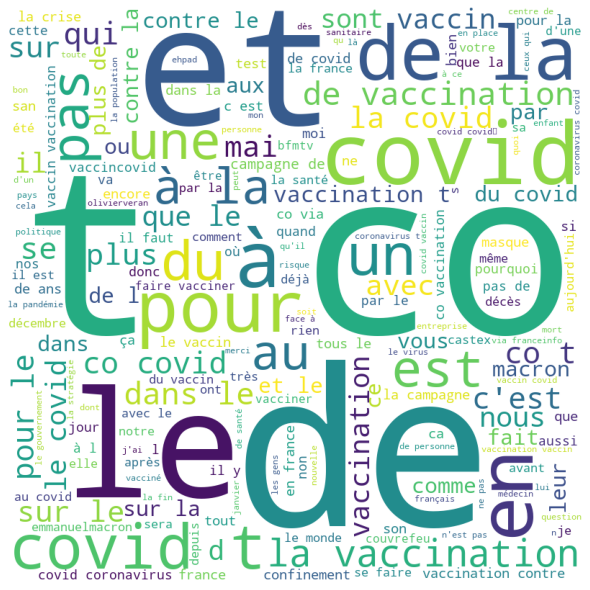

In [33]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in covid_tweets.corpus_clean: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 